In [1]:
def mount_drive(dir):
  import os
  colab = 1
  if colab == 1:
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    current_folder = dir
    dest_folder = '/content/drive/My Drive/' + current_folder
    os.chdir(dest_folder)
    print('\n Current path: ' + os.getcwd())

mount_drive('')

Mounted at /content/drive

 Current path: /content/drive/My Drive


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
from collections import Counter
import datetime
from matplotlib.pyplot import figure
import numpy as np

In [3]:
all_tracks = pd.read_csv("all_tracks_saved.csv")
recent_songs = pd.read_csv("recent_songs.csv")
top_art = pd.read_csv("top_artists.csv")
top_songs = pd.read_csv("top_songs.csv")

In [4]:
all_tracks.head()

,Unnamed: 0,track_name,artist_name,artist_genre,album_name,release_date,album_track_amount,song_duration_minutes,popularity_score,track_number_on_album,playlist
0,0,Antpile 2,Kublai Khan TX,"['hardcore', 'deathcore', 'metalcore']",Exhibition Of Prowess,2024-09-20,10,0.948285,56,10,My top tracks playlist
1,1,In Bloom,Sturgill Simpson,"['outlaw country', 'alt country', 'bluegrass',...",A Sailor's Guide to Earth,2016-04-15,9,4.010675,59,5,My top tracks playlist
2,2,Killed By An Angel,Sunny Day Real Estate,"['midwest emo', 'emo', 'post-hardcore', 'math ...",The Rising Tide,2000-06-20,11,4.925560,45,1,My top tracks playlist
3,3,Beer,Reel Big Fish,"['ska', 'ska punk', 'punk']",Turn The Radio Off,1996,15,3.508890,61,6,My top tracks playlist
4,4,Concorde,"Black Country, New Road","['art rock', 'post-rock', 'post-punk']",Ants From Up There,2022-02-04,10,6.062895,58,3,My top tracks playlist


In [5]:
recent_songs.head()

,Unnamed: 0,track_name,artist_name,artist_genre,album_name,release_date,album_track_amount,song_duration_minutes,popularity_score,track_number_on_album,issingle
0,0,The Adventures of Rain Dance Maggie,Red Hot Chili Peppers,"['funk rock', 'alternative rock', 'rock']",I'm with You,2011-08-29,14,4.706676,68,7,0
1,1,Comfortable Liar,Chevelle,"['alternative metal', 'nu metal', 'post-grunge...",Wonder What's Next (Expanded Edition),2002,15,3.721107,73,2,0
2,2,The Red,Chevelle,"['alternative metal', 'nu metal', 'post-grunge...",Wonder What's Next (Expanded Edition),2002,15,3.973341,80,5,0
3,3,Loose Talk,Show Me the Body,['noise rock'],Trouble The Water,2022-10-28,12,3.437457,40,1,0
4,4,I Will Not Bow,Breaking Benjamin,"['alternative metal', 'post-grunge', 'rock', '...",Dear Agony,2009-01-01,11,3.612224,75,2,0


In [6]:
top_art.head()

,Unnamed: 0,artist_name,artist_genres,artist_popularity,artist_followers,time_frame
0,0,Papa Roach,"['nu metal', 'rap metal', 'alternative metal',...",76,"{'href': None, 'total': 5900287}",short
1,1,Breaking Benjamin,"['alternative metal', 'post-grunge', 'rock', '...",75,"{'href': None, 'total': 5049149}",short
2,2,Red Hot Chili Peppers,"['funk rock', 'alternative rock', 'rock']",86,"{'href': None, 'total': 22757354}",short
3,3,Kid Cudi,[],81,"{'href': None, 'total': 7568178}",short
4,4,Seiko Matsuda,"['kayokyoku', 'city pop', 'enka', 'j-pop']",59,"{'href': None, 'total': 471854}",short


In [7]:
top_songs.head()

,Unnamed: 0,track_name,artist_name,artist_genre,album_name,release_date,album_track_amount,song_duration_minutes,popularity_score,track_number_on_album,term
0,0,The Diary of Jane - Single Version,Breaking Benjamin,"['alternative metal', 'post-grunge', 'rock', '...",Phobia (Clean Version),2006-01-01,13,3.342440,79,2,short
1,1,Savior,Rise Against,"['punk', 'hardcore punk']",Appeal To Reason,2008-01-01,14,4.038008,81,11,short
2,2,love.,Kid Cudi,[],The Boy Who Flew To The Moon (Vol. 1),2022-07-08,18,5.476228,65,18,short
3,3,Lakini's Juice,Live,"['post-grunge', 'grunge']",Secret Samadhi,1997-01-01,12,4.987777,58,2,short
4,4,Already Gone,Crossfade,['post-grunge'],Falling Away,2006-08-29,11,3.436224,53,2,short


In [8]:
all_tracks["artist_genre"] = all_tracks["artist_genre"].apply(literal_eval)
top_art["artist_genres"] = top_art["artist_genres"].apply(literal_eval)
top_songs["artist_genre"] = top_songs["artist_genre"].apply(literal_eval)

In [9]:
all_tracks = all_tracks.dropna()

In [10]:
top_songs['release_date'] = pd.to_datetime(top_songs['release_date'], format='mixed')
top_songs = top_songs.dropna(subset=['release_date'])
top_songs['decade'] = (top_songs['release_date'].dt.year // 10) * 10
top_songs['decade'] = top_songs['decade'].astype(int).astype(str) + 's'

recent_songs['release_date'] = pd.to_datetime(recent_songs['release_date'], format='mixed')
recent_songs = recent_songs.dropna(subset=['release_date'])
recent_songs['decade'] = (recent_songs['release_date'].dt.year // 10) * 10
recent_songs['decade'] = recent_songs['decade'].astype(int).astype(str) + 's'

all_tracks['release_date'] = pd.to_datetime(all_tracks['release_date'], format='mixed')
all_tracks = all_tracks.dropna(subset=['release_date'])
all_tracks['decade'] = (all_tracks['release_date'].dt.year // 10) * 10
all_tracks['decade'] = all_tracks['decade'].astype(int).astype(str) + 's'

In [11]:
list_genres_in_all_tracks = []

for i in range(0, len(all_tracks)):
  list_genres_in_all_tracks = list_genres_in_all_tracks + all_tracks.iloc[i]["artist_genre"]

count_genres = Counter(list_genres_in_all_tracks)

In [12]:
count_genres_top_10 = dict(sorted(count_genres.items(), key=lambda x: x[1], reverse=True)[:10])

X_value_genres = list(count_genres_top_10.keys())
Y_value_genres = list(count_genres_top_10.values())

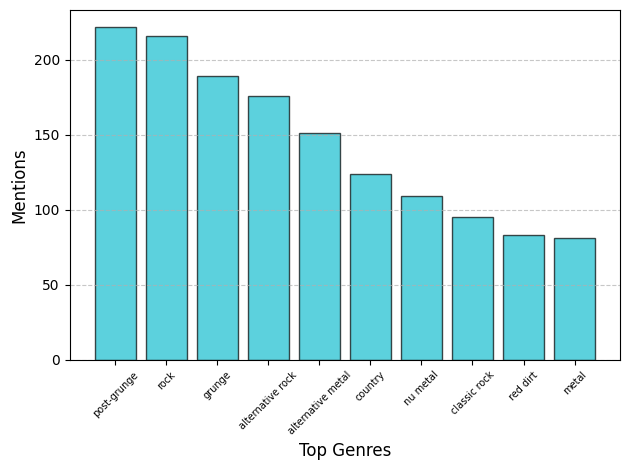

In [13]:
plt.bar(X_value_genres, Y_value_genres, color='#17becf', alpha=0.7, edgecolor='black')
plt.ylabel("Mentions", fontsize=12)
plt.xlabel("Top Genres", fontsize=12)
plt.xticks(rotation=45, fontsize=7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [30]:
overall_top_decade_count = top_songs["decade"].value_counts().sort_index()
terms_top_decade_count = top_songs.groupby('term')['decade'].value_counts().sort_index()

In [32]:
overall_count_vals = overall_top_decade_count.values
overall_count_keys = overall_top_decade_count.keys()

long_term_vals = terms_top_decade_count["long"].values
long_term_keys = terms_top_decade_count["long"].keys()

med_term_vals = terms_top_decade_count["medium"].values
med_term_keys = terms_top_decade_count["medium"].keys()

short_term_vals = terms_top_decade_count["short"].values
short_term_keys = terms_top_decade_count["short"].keys()

In [107]:
colors_box_sub_plot = ["#1f77b4",
          "#2ca02c",
          "#76d7c4",
          "#a9dfbf"]

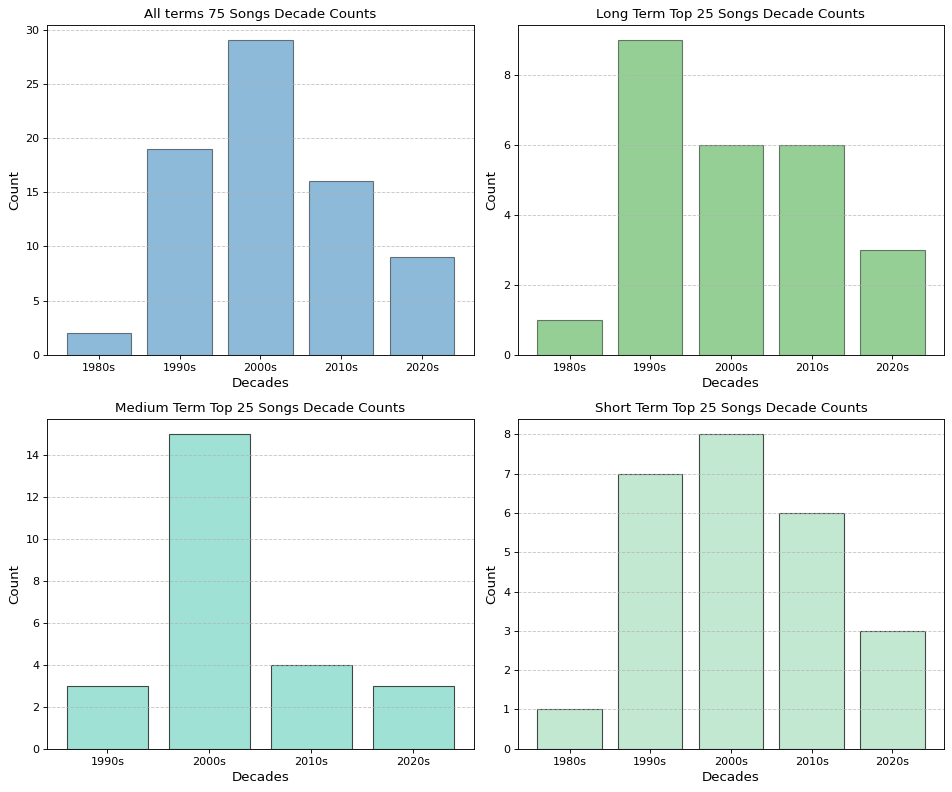

In [111]:
figure(figsize=(12, 10), dpi=80)

plt.subplot(2, 2, 1)
plt.bar(overall_count_keys,overall_count_vals, color = colors_box_sub_plot[0], alpha=0.5, edgecolor='black')
plt.ylabel("Count", fontsize=12)
plt.xlabel("Decades", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.title("All terms 75 Songs Decade Counts")

plt.subplot(2, 2, 2)
plt.bar(long_term_keys, long_term_vals, color = colors_box_sub_plot[1], alpha=0.5, edgecolor='black')
plt.ylabel("Count", fontsize=12)
plt.xlabel("Decades", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.title("Long Term Top 25 Songs Decade Counts")

plt.subplot(2, 2, 3)
plt.bar(med_term_keys, med_term_vals, color = colors_box_sub_plot[2], alpha=0.7, edgecolor='black')
plt.ylabel("Count", fontsize=12)
plt.xlabel("Decades", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.title("Medium Term Top 25 Songs Decade Counts")

plt.subplot(2, 2, 4)
plt.bar(short_term_keys, short_term_vals, color = colors_box_sub_plot[3], alpha=0.7, edgecolor='black')
plt.ylabel("Count", fontsize=12)
plt.xlabel("Decades", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.title("Short Term Top 25 Songs Decade Counts")


plt.show()

In [85]:
top_songs_short = top_songs[top_songs["term"] == "short"]
top_songs_med = top_songs[top_songs["term"] == "medium"]
top_songs_long = top_songs[top_songs["term"] == "long"]

short_songs_duration = np.array(top_songs_short["song_duration_minutes"])
med_songs_duration = np.array(top_songs_med["song_duration_minutes"])
long_songs_duration = np.array(top_songs_long["song_duration_minutes"])

most_recent_25_songs = recent_songs.iloc[:25]["song_duration_minutes"]
recent_songs_duration = np.array(most_recent_25_songs)

In [97]:
combined_durations = [short_songs_duration, med_songs_duration, long_songs_duration, recent_songs_duration]

mean = [np.mean(d) for d in combined_durations]
std_devs = [np.std(d) for d in combined_durations]

The green(teal) dot is the mean with the line being the standard deviation while the blue line is the median.


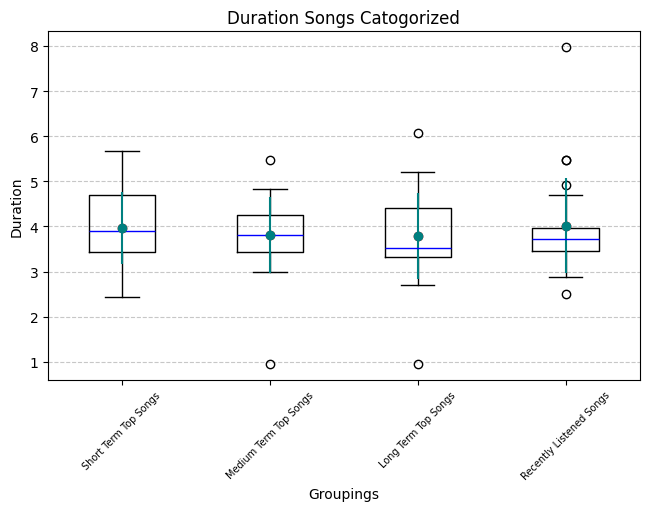

In [112]:
print("The green(teal) dot is the mean with the line being the standard deviation while the blue line is the median.")

plt.boxplot(combined_durations, positions=[1, 2, 3, 4], tick_labels = ["Short Term Top Songs", "Medium Term Top Songs",
                                                                  "Long Term Top Songs", "Recently Listened Songs"],
            medianprops=dict(color='blue'))

for i in range(len(mean)):
   plt.plot(i + 1, mean[i], 'ro')
   plt.errorbar(i + 1, mean[i], yerr=std_devs[i], fmt='o', color='teal')

plt.xticks(rotation=45, fontsize=7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.title("Duration Songs Catogorized")
plt.xlabel("Groupings")
plt.ylabel("Duration")
plt.show()